In [104]:
import glob

import numpy as np

import specutils
from ccdproc import ImageFileCollection
from astropy.table import Table
from astropy.io import fits
import astropy.units as u

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [78]:
posterdir = '/melkor/d1/guenther/Dropbox/my_talks/19_Chandra20/'

In [3]:
datapath = '/melkor/d1/guenther/downdata/HST/TW_Hya/COS_all/'

In [88]:
x1dsum = glob.glob('/melkor/d1/guenther/downdata/HST/TW_Hya/all_x1dsum/MAST_2019-12-02T1552/HST/*/*x1dsum.fits')
x1dsum.sort()  # Will make them sorted in time because that is how file names are in HST

In [89]:
files = ImageFileCollection(filenames=x1dsum)

In [90]:
hdus = fits.open(x1dsum[0])

In [91]:
hdus.info()

Filename: /melkor/d1/guenther/downdata/HST/TW_Hya/all_x1dsum/MAST_2019-12-02T1552/HST/lbl201010/lbl201010_x1dsum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     165   ()      
  1  SCI           1 BinTableHDU    249   3R x 13C   [4A, 1D, 1J, 1274D, 1274E, 1274E, 1274E, 1274E, 1274E, 1274E, 1274I, 1274E, 1274E]   


In [92]:
hdus[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                    1 / Number of standard extensions                  
DATE    = '2019-08-20'         / date this file was written (yyyy-mm-dd)        
FILENAME= 'lbl201010_x1dsum.fits' / name of file                                
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'COS   '             / identifier for instrument used to acquire data 
EQUINOX =               2000.0 / equinox of celestial coord. system             
                            

In [93]:
tab

SEGMENT,EXPTIME,NELEM,WAVELENGTH [16384],FLUX [16384],ERROR [16384],GROSS [16384],GCOUNTS [16384],NET [16384],BACKGROUND [16384],DQ [16384],DQ_WGT [16384]
,s,,Angstrom,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),ct / s,ct,ct / s,ct / s,,
bytes4,float64,int32,float64,float32,float32,float32,float32,float32,float32,int16,float32
FUVA,2082.592,16384,1562.714458088869 .. 1763.3564461415633,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,128 .. 128,0.0 .. 0.0
FUVB,2082.592,16384,1374.5593550124206 .. 1575.0518254974545,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,128 .. 128,0.0 .. 0.0


In [94]:
fuvfiles = files.filter(DETECTOR='FUV')

In [95]:
expstart = [fits.getval(f, 'EXPSTART', ext=1) for f in fuvfiles.files]
expend = [fits.getval(f, 'EXPEND', ext=1) for f in fuvfiles.files]
expstart

[55661.38999458,
 55661.44757532,
 55661.51803828,
 55662.58828162,
 55664.44821199,
 55666.39453162,
 55669.43137273,
 55677.36771421,
 55681.29764495,
 55687.20161495,
 58564.65902809,
 58564.91745402,
 58565.11628513,
 58565.25439846,
 58565.51950254,
 58565.7201392,
 58565.91717624,
 58670.05953735,
 58670.25895883,
 58670.39710661,
 58670.65571809,
 58670.92070624,
 58671.11946772,
 58671.32068328]

55664.48726851852
58562.90207175926
58672.023981481485
55664.48726851852
58562.90207175926
58672.023981481485
55664.48726851852
58562.90207175926
58672.023981481485


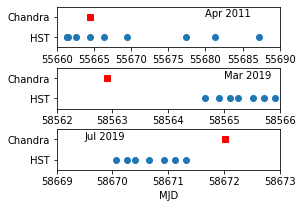

In [110]:
from astropy.time import Time
from matplotlib import ticker

# Ignore the one where I can't reduce Chandra for now
# Later want three panels
fig, axes = plt.subplots(nrows=3, figsize=(4,3))
for ax in axes:
    ax.plot(expstart, np.ones_like(expstart), 'o')
    #for e1, e2 in zip(expstart, expend):
        #print(e1, e2)
    #    ax.plot([e1, e2], [1, 1], 'b', lw=5)


for ax in axes:
    for t in ["2011-04-13 11:41:40", "2019-03-20 21:38:59", "2019-07-08 00:34:32"]:
        chantime = Time(t)
        print(chantime.mjd)
        ax.plot(chantime.mjd, 1.1, 'rs')
        
axes[0].set_xlim(55660, 55690)
axes[1].set_xlim(58562, 58566)
axes[2].set_xlim(58669, 58673)

for ax in axes:
    ax.set_ylim(0.95, 1.15)
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.ticklabel_format(useOffset=False)
    #out = plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_yticklabels(['', 'HST', 'Chandra'])

for ax in axes[1:]:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))

fig.subplots_adjust(hspace=.5) 
axes[-1].set_xlabel('MJD')

axes[0].text(55680, 1.1, 'Apr 2011')
axes[1].text(58565., 1.1, 'Mar 2019')
axes[2].text(58669.5, 1.1, 'Jul 2019')

fig.savefig(posterdir + 'timeline.png', bbox_inches='tight', dpi=300)

In [99]:
sp = []
for f in fuvfiles.files:
    sp.append(specutils.Spectrum1D.read(f, format='HST/COS'))

In [105]:
s.spectral_axis.unit

Unit("Angstrom")

(1546, 1554)

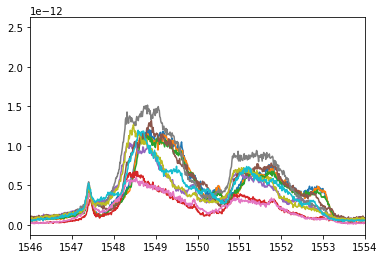

In [103]:
for s in sp[:10]:
    plt.plot(s.spectral_axis, s.flux)
plt.xlim([1546, 1554])

/nfs/melkor/d1/guenther/soft/anaconda/envs/stsci/lib/python3.6/site-packages/ipykernel/__main__.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


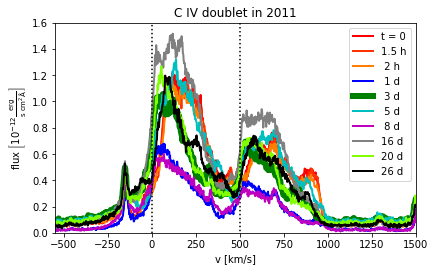

In [150]:
CIV = np.array([1548.19, 1550.775]) * u.Angstrom
colorlist = [(1,0,0), (1,.2,0), (1., .5,0), 'b', 'g','c','m', 'grey', 'chartreuse', 'k',
             'sienna', 'lime', 'lightsalmon', '0.2', '0.4', '0.6', '0.8',  (.2,1.,.2), 'r','g']
labellist = ['t = 0', '1.5 h', ' 2 h', ' 1 d', ' 3 d', ' 5 d', ' 8 d', '16 d', '20 d', '26 d']


def eq(wave):
    return {'equivalencies': u.doppler_optical(wave)}


def plot_doublet(spectra, waves, title='', bin_up=1):
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    for s, c, l in zip(spectra, colorlist, labellist):
        line = plt.plot(s.spectral_axis.to(u.km/u.s, **eq(waves[0])).value,
                        s.flux *1e12, color = c, label=l,
                       lw=2 if l != ' 3 d' else 6)

    ax.set_xlabel(r'v [km/s]')
    ax.set_ylabel(r'flux $\left[10^{-12} \frac{\rm{erg}}{\rm{s\;cm}^2 \AA}\right]$')
    ax.plot([0,0], ax.get_ylim(), 'k:')
    ax.plot(waves[[1,1]].to(u.km/u.second, **eq(waves[0])).value, ax.get_ylim(), 'k:')
    ax.set_xlim([-550, 1500])
    ax.set_ylim([0, 1.6])
    ax.legend()
    ax.set_title(title)
    return fig

fig = plot_doublet(sp[:10], CIV, 'C IV doublet in 2011')
fig.subplots_adjust(right=0.96, bottom=0.15)
fig.savefig(posterdir + 'CIV2011.png', bbox_inches='tight', dpi=300)

/nfs/melkor/d1/guenther/soft/anaconda/envs/stsci/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()


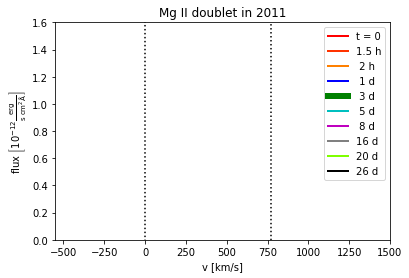

In [151]:
MgII = np.array([2796.3521, 2803.5310]) * u.Angstrom
fig = plot_doublet(sp[:10], MgII, 'Mg II doublet in 2011')
fig.savefig(posterdir + 'MgII2011.png', bbox_inches='tight', dpi=300)

/nfs/melkor/d1/guenther/soft/anaconda/envs/stsci/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


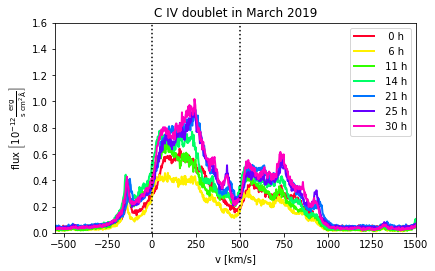

In [148]:
tlabel = (np.array(expstart[10:17]) - expstart[10]) * 24
labellist = [f'{t:3.0f} h' for t in tlabel]
cmap =  plt.cm.get_cmap('gist_rainbow')
colorlist = [cmap(i/tlabel[-1]) for i in tlabel]
fig = plot_doublet(sp[10:17], CIV, 'C IV doublet in March 2019')
fig.subplots_adjust(right=0.96, bottom=0.15)
fig.savefig(posterdir + 'CIV2019a.png', bbox_inches='tight', dpi=300)

/nfs/melkor/d1/guenther/soft/anaconda/envs/stsci/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


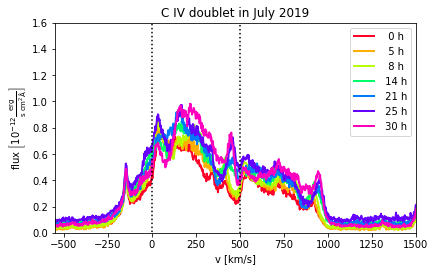

In [149]:
tlabel = (np.array(expstart[17:]) - expstart[17]) * 24
labellist = [f'{t:3.0f} h' for t in tlabel]
cmap =  plt.cm.get_cmap('gist_rainbow')
colorlist = [cmap(i/tlabel[-1]) for i in tlabel]

fig = plot_doublet(sp[17:], CIV, 'C IV doublet in July 2019')
fig.subplots_adjust(right=0.96, bottom=0.15)
fig.savefig(posterdir + 'CIV2019b.png', bbox_inches='tight', dpi=300)

In [ ]:
# fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True)

for i, f in enumerate(x1dsum):
    fbase = f.split('_x1d')
    for n in ['', '2', '3', '4']:
        s = specutils.Spectrum1D.read('{}_x1dsum{}.fits'.format(fbase[0], n), format='HST/COS')
        axes.flatten()[i].plot(s.spectral_axis, s.flux)

In [31]:
axes.flatten()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f103052af28>,
      dtype=object)

In [26]:
fbase

['/melkor/d1/guenther/downdata/HST/TW_Hya/COS_new/ldka53010', 'sum.fits']